Tutoria 1: Fundamentos de DS

Uso de pandas y análisis estadístico de los datos.


Se analizará el set de datos 'abalone_data.csv'
que está disponible en el repositorio de la universidad de california en Irvine:

https://archive.ics.uci.edu/ml/index.php

Se pide:

- Leer el archivo separado en comas utilizando pandas, guardarlo en un dataframe
- Inspeccionar, usando métodos de pandas, obtener: Número de columnas, nombre de las columnas, cantidad de observaciones, existen datos perdidos?, de qué tipo son las observaciones (categorias, números, string).
- Obtener una descripción de cada columna, que contenga datos cuartílicos, dato más repetido, media, mediana y desviación estandar. Qué podemos concluir de esto?
- Cuál es el porcentaje de muestras por cada sexo
- Cuantos individuos tienen más de 10 anillos, cuál es el porcentaje de individuos con >10 anillos, en total y por categoría.
- Qué variable representa más evidentemente la separación de las tres categorías muestreadas: Diametro, whole weight ó Rings?. Qué estadísticas pueden ser útiles para representar esto? (visualmente)

In [1]:
import pandas as pd

abalone = pd.read_csv('abalone_data.csv', sep = ',',encoding='utf-8')

In [2]:
abalone.head(10)

,Sex,Length,Diameter,Height,Whole weight,Shucked weight,Viscera weight,Shell weight,Rings
0,M,0.455,0.365,0.095,0.5140,0.2245,0.1010,0.150,15
1,M,0.350,0.265,0.090,0.2255,0.0995,0.0485,0.070,7
2,F,0.530,0.420,0.135,0.6770,0.2565,0.1415,0.210,9
3,M,0.440,0.365,0.125,0.5160,0.2155,0.1140,0.155,10
4,I,0.330,0.255,0.080,0.2050,0.0895,0.0395,0.055,7
5,I,0.425,0.300,0.095,0.3515,0.1410,0.0775,0.120,8
6,F,0.530,0.415,0.150,0.7775,0.2370,0.1415,0.330,20
7,F,0.545,0.425,0.125,0.7680,0.2940,0.1495,0.260,16
8,M,0.475,0.370,0.125,0.5095,0.2165,0.1125,0.165,9
9,F,0.550,0.440,0.150,0.8945,0.3145,0.1510,0.320,19


In [3]:
columnas = abalone.columns
print(columnas)

Index(['Sex', 'Length', 'Diameter', 'Height', 'Whole weight', 'Shucked weight',
       'Viscera weight', 'Shell weight', 'Rings'],
      dtype='object')


In [4]:
abalone.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4177 entries, 0 to 4176
Data columns (total 9 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Sex             4177 non-null   object 
 1   Length          4177 non-null   float64
 2   Diameter        4177 non-null   float64
 3   Height          4177 non-null   float64
 4   Whole weight    4177 non-null   float64
 5   Shucked weight  4177 non-null   float64
 6   Viscera weight  4177 non-null   float64
 7   Shell weight    4177 non-null   float64
 8   Rings           4177 non-null   int64  
dtypes: float64(7), int64(1), object(1)
memory usage: 293.8+ KB


In [5]:
abalone['Sex'].unique()

array(['M', 'F', 'I'], dtype=object)

In [6]:
abalone['Rings'].mean(), abalone['Rings'].median(),abalone['Rings'].std(),abalone['Rings'].quantile(0.25)

(9.933684462532918, 9.0, 3.2241690320681284, 8.0)

In [7]:
abalone.describe()

,Length,Diameter,Height,Whole weight,Shucked weight,Viscera weight,Shell weight,Rings
count,4177.000000,4177.000000,4177.000000,4177.000000,4177.000000,4177.000000,4177.000000,4177.000000
mean,0.523992,0.407881,0.139516,0.828742,0.359367,0.180594,0.238831,9.933684
std,0.120093,0.099240,0.041827,0.490389,0.221963,0.109614,0.139203,3.224169
min,0.075000,0.055000,0.000000,0.002000,0.001000,0.000500,0.001500,1.000000
25%,0.450000,0.350000,0.115000,0.441500,0.186000,0.093500,0.130000,8.000000
50%,0.545000,0.425000,0.140000,0.799500,0.336000,0.171000,0.234000,9.000000
75%,0.615000,0.480000,0.165000,1.153000,0.502000,0.253000,0.329000,11.000000
max,0.815000,0.650000,1.130000,2.825500,1.488000,0.760000,1.005000,29.000000


In [8]:
total_samples = abalone['Sex'].count()

Male_samples = abalone[abalone.Sex == 'M']['Sex'].count()
Female_samples = abalone[abalone.Sex == 'F']['Sex'].count()
Infant_samples = abalone[abalone.Sex == 'I']['Sex'].count()

print('Porcentaje Male: ' + str(Male_samples*100/total_samples))
print('Porcentaje Female: ' + str(Female_samples*100/total_samples))
print('Porcentaje Infant: ' + str(Infant_samples*100/total_samples))

Porcentaje Male: 36.58127842949485
Porcentaje Female: 31.290399808474984
Porcentaje Infant: 32.12832176203017


In [9]:
plus10rings = abalone[abalone.Rings > 10].Rings.count()
'''
DF[condicion].columna

DF[columna] == DF.columna 

columna = 'the_rings'

((DF2 está contenido DF).series).metodo
'''
cond1 = (abalone.Sex == 'M')
cond2 = (abalone.Rings > 10)
mask = cond1 & cond2
plus10ringsM = abalone[mask].Rings.count()
plus10ringsF = abalone[(abalone.Sex == 'F') & (abalone.Rings > 10)].Rings.count()
plus10ringsI = abalone[(abalone.Sex == 'I') & (abalone.Rings > 10)].Rings.count()

print('Porcentaje > 10 ' + str(plus10rings*100/total_samples))
print('Porcentaje > 10 Male: ' + str(plus10ringsM*100/total_samples))
print('Porcentaje > 10 Female: ' + str(plus10ringsF*100/total_samples))
print('Porcentaje > 10 Infant: ' + str(plus10ringsI*100/total_samples))

print('Porcentaje > 10 Male: ' + str(plus10ringsM*100/plus10rings))
print('Porcentaje > 10 Female: ' + str(plus10ringsF*100/plus10rings))
print('Porcentaje > 10 Infant: ' + str(plus10ringsI*100/plus10rings))



Porcentaje > 10 34.64208762269571
Porcentaje > 10 Male: 15.72899209959301
Porcentaje > 10 Female: 15.202298300215466
Porcentaje > 10 Infant: 3.7107972228872397
Porcentaje > 10 Male: 45.40428472702143
Porcentaje > 10 Female: 43.88389771941949
Porcentaje > 10 Infant: 10.711817553559088


In [10]:
abalone_mini = abalone[['Sex','Diameter','Whole weight','Rings']]

In [11]:
keep = ['Sex','Diameter','Whole weight','Rings']

delete = list(set(columnas).difference(set(keep)))

abalone_mini2 = abalone.drop(columns = delete)

In [12]:
abalone_mini3 = abalone.iloc[:,[0,2,4,8]]

In [13]:
abalone_mini.head(10)

,Sex,Diameter,Whole weight,Rings
0,M,0.365,0.5140,15
1,M,0.265,0.2255,7
2,F,0.420,0.6770,9
3,M,0.365,0.5160,10
4,I,0.255,0.2050,7
5,I,0.300,0.3515,8
6,F,0.415,0.7775,20
7,F,0.425,0.7680,16
8,M,0.370,0.5095,9
9,F,0.440,0.8945,19


In [14]:
abalone_mini2.head(10)

,Sex,Diameter,Whole weight,Rings
0,M,0.365,0.5140,15
1,M,0.265,0.2255,7
2,F,0.420,0.6770,9
3,M,0.365,0.5160,10
4,I,0.255,0.2050,7
5,I,0.300,0.3515,8
6,F,0.415,0.7775,20
7,F,0.425,0.7680,16
8,M,0.370,0.5095,9
9,F,0.440,0.8945,19


In [15]:
abalone_mini3.head(10)

,Sex,Diameter,Whole weight,Rings
0,M,0.365,0.5140,15
1,M,0.265,0.2255,7
2,F,0.420,0.6770,9
3,M,0.365,0.5160,10
4,I,0.255,0.2050,7
5,I,0.300,0.3515,8
6,F,0.415,0.7775,20
7,F,0.425,0.7680,16
8,M,0.370,0.5095,9
9,F,0.440,0.8945,19


In [16]:
abalone_M = abalone_mini[abalone_mini.Sex == 'M']
abalone_F = abalone_mini[abalone_mini.Sex == 'F']
abalone_I = abalone_mini[abalone_mini.Sex == 'I']

In [17]:
abalone_M.describe()

,Diameter,Whole weight,Rings
count,1528.000000,1528.000000,1528.000000
mean,0.439287,0.991459,10.705497
std,0.084398,0.470581,3.026349
min,0.110000,0.015500,3.000000
25%,0.395000,0.671625,9.000000
50%,0.455000,0.975750,10.000000
75%,0.500000,1.265625,12.000000
max,0.630000,2.825500,27.000000


In [18]:
abalone_F.describe()

,Diameter,Whole weight,Rings
count,1307.000000,1307.000000,1307.000000
mean,0.454732,1.046532,11.129304
std,0.070954,0.430316,3.104256
min,0.195000,0.080000,5.000000
25%,0.410000,0.730000,9.000000
50%,0.465000,1.038500,10.000000
75%,0.505000,1.320250,12.000000
max,0.650000,2.657000,29.000000


In [19]:
abalone_I.describe()

,Diameter,Whole weight,Rings
count,1342.000000,1342.000000,1342.000000
mean,0.326494,0.431363,7.890462
std,0.088109,0.286275,2.511554
min,0.055000,0.002000,1.000000
25%,0.270000,0.205500,6.000000
50%,0.335000,0.384000,8.000000
75%,0.390000,0.599375,9.000000
max,0.550000,2.049500,21.000000


In [20]:
perc_Diametro = []
perc_Weight = []
perc_Rings = []
porcentaje = []
sex = []
resolution = 100
for sexo in abalone_mini.Sex.unique():
  for i in range(resolution):
    perc_Diametro.append(abalone_mini[abalone_mini.Sex == sexo].Diameter.quantile(i/resolution))
    perc_Weight.append(abalone_mini[abalone_mini.Sex == sexo]['Whole weight'].quantile(i/resolution))
    perc_Rings.append(abalone_mini[abalone_mini.Sex == sexo].Rings.quantile(i/resolution))
    porcentaje.append(i)
    sex.append(sexo)

In [21]:
Percentiles = pd.DataFrame({'Diameter':perc_Diametro,
                          'Weight':perc_Weight,
                          'Rings':perc_Rings,
                          'Sex':sex,
                          'Percentil':porcentaje})

In [22]:
Percentiles.head(12)

,Diameter,Weight,Rings,Sex,Percentil
0,0.1100,0.015500,3.0,M,0
1,0.1950,0.085755,5.0,M,1
2,0.2177,0.120270,6.0,M,2
3,0.2400,0.163000,6.0,M,3
4,0.2550,0.195000,7.0,M,4
5,0.2650,0.217700,7.0,M,5
6,0.2800,0.243790,7.0,M,6
7,0.2950,0.279280,7.0,M,7
8,0.3050,0.305580,7.0,M,8
9,0.3150,0.350505,8.0,M,9


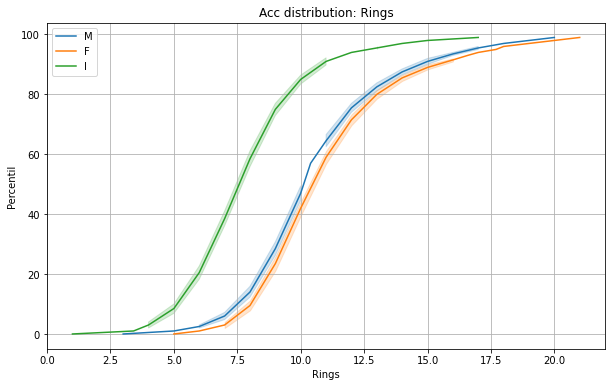

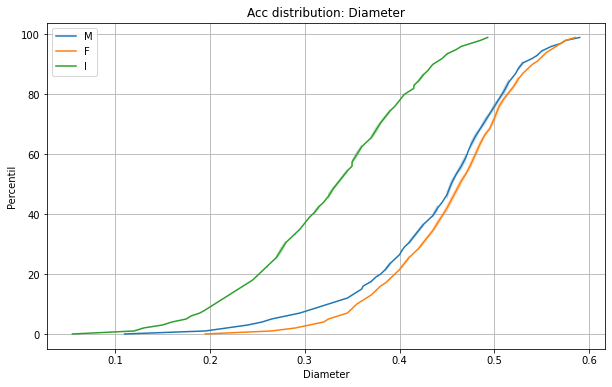

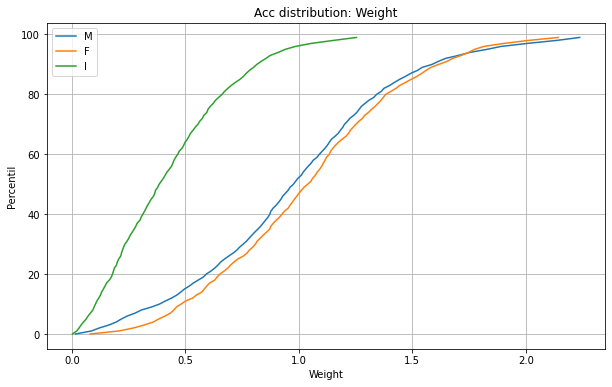

In [23]:
import matplotlib.pyplot as plt
import seaborn as sns

for column in ['Rings','Diameter','Weight']:
  plt.figure(figsize = (10,6))
  sns.lineplot(x = column, y = 'Percentil', data = Percentiles, hue = 'Sex')
  plt.grid()
  plt.legend()
  plt.title('Acc distribution: ' + column)
  plt.show()


# Probabilidades y Funciones. 18 de Agosto de 2022

Siguiendo con el conjunto de datos de Abalone, obtener lo siguiente:

i) La probabilidad de poseer 5 ó 12 Anillos, dado que pertenece a una categoría en particular (Tomar una).

ii) Implementar el cálculo de tal probabilidad tomando como parámetros el df, la cantidad de anillos y la categoría. cuál es la probabilidad para los distintos valores de 'Rings' en la muestra, para la categoría 'F'. Cómo se relaciona con los gráficos de la sesión anterior?

iii) Genere un histograma para cada categoría, basado en la variable 'Rings', para qué valor (>0) tenemos el valor típico en cada categoria?. Podemos cambiar algo para visualizar mejor? Cómo podríamos cambiarlo para visualizar lo calculado en (i)?

In [24]:
abalone.head(20)

,Sex,Length,Diameter,Height,Whole weight,Shucked weight,Viscera weight,Shell weight,Rings
0,M,0.455,0.365,0.095,0.5140,0.2245,0.1010,0.150,15
1,M,0.350,0.265,0.090,0.2255,0.0995,0.0485,0.070,7
2,F,0.530,0.420,0.135,0.6770,0.2565,0.1415,0.210,9
3,M,0.440,0.365,0.125,0.5160,0.2155,0.1140,0.155,10
4,I,0.330,0.255,0.080,0.2050,0.0895,0.0395,0.055,7
5,I,0.425,0.300,0.095,0.3515,0.1410,0.0775,0.120,8
6,F,0.530,0.415,0.150,0.7775,0.2370,0.1415,0.330,20
7,F,0.545,0.425,0.125,0.7680,0.2940,0.1495,0.260,16
8,M,0.475,0.370,0.125,0.5095,0.2165,0.1125,0.165,9
9,F,0.550,0.440,0.150,0.8945,0.3145,0.1510,0.320,19


In [25]:
# i) => (P(Rings == 5) + P(Rings == 12)) * P(Sex == 'F)

p5 = abalone[abalone.Rings == 5].Rings.count()/abalone.Rings.count()
p12 = abalone[abalone.Rings == 12].Rings.count()/abalone.Rings.count()
pF = abalone[abalone.Sex == 'F'].Sex.count()/abalone.Sex.count()

print('La probabilidad de 5 ó 12 dado que loas abalone son F: ' + str((p5+p12)*pF*100) + '%')

La probabilidad de 5 ó 12 dado que loas abalone son F: 2.86160706891009%


In [26]:
'''ii) Implementar el cálculo de tal probabilidad tomando como parámetros el df,
 la cantidad de anillos y la categoría. cuál es la probabilidad para los distintos 
 valores de 'Rings' en la muestra, para la categoría 'F'. Cómo se relaciona con los 
 gráficos de la sesión anterior?'''

def prob_compute(df, condition_name, condition):

  pa = df[df[condition_name] == condition][condition_name].count()/df[condition_name].count()

  return pa

ring_values = sorted(list(abalone.Rings.unique()))
resultado = []
resultado1 = []
resultado2 = []

for i in (ring_values):
  resultado.append(prob_compute(abalone,'Rings',i)*(prob_compute(abalone,'Sex','F')))
  resultado1.append(prob_compute(abalone,'Rings',i)*(prob_compute(abalone,'Sex','M')))
  resultado2.append(prob_compute(abalone,'Rings',i)*(prob_compute(abalone,'Sex','I')))

print(ring_values,resultado)

[1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 29] [7.491117981440024e-05, 7.491117981440024e-05, 0.0011236676972160037, 0.004269937249420814, 0.008614785678656029, 0.019401995571929665, 0.029290271307430494, 0.04254955013457934, 0.05161380289212177, 0.04749368800232976, 0.03648174456961292, 0.020001285010444868, 0.015206969502323251, 0.009438808656614431, 0.007715851520883226, 0.005019049047564816, 0.004344848429235214, 0.0031462695522048107, 0.0023971577540608077, 0.0019476906751744066, 0.0010487565174016034, 0.00044946707888640153, 0.0006742006183296023, 0.00014982235962880048, 7.491117981440024e-05, 7.491117981440024e-05, 0.00014982235962880048, 7.491117981440024e-05]


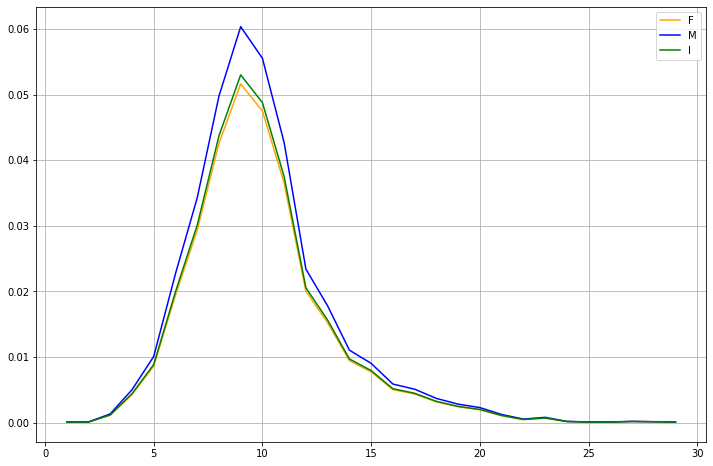

In [27]:
plt.figure(figsize=(12,8))
plt.plot(ring_values,resultado, color = 'orange', label = 'F')
plt.plot(ring_values,resultado1, color = 'blue', label = 'M')
plt.plot(ring_values,resultado2, color = 'green', label = 'I')
plt.legend()
plt.grid()
plt.show()

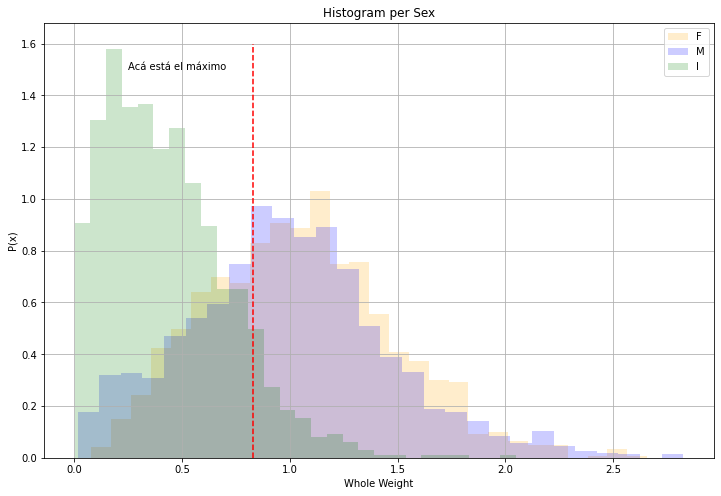

In [28]:
plt.figure(figsize=(12,8))
plt.hist(abalone[abalone.Sex == 'F']['Whole weight'],bins = len(ring_values), color = 'orange',label = 'F', alpha = 0.2, density = True)
plt.hist(abalone[abalone.Sex == 'M']['Whole weight'],bins = len(ring_values), color = 'blue',label = 'M', alpha = 0.2, density = True)
plt.hist(abalone[abalone.Sex == 'I']['Whole weight'],bins = len(ring_values), color = 'green',label = 'I', alpha = 0.2, density = True)
plt.legend()
plt.title('Histogram per Sex')
plt.xlabel('Whole Weight')
plt.vlines(abalone['Whole weight'].mean(),0,1.6, linestyles= '--', color = 'red')
plt.ylabel('P(x)')
plt.text(0.25,1.5,'Acá está el máximo')
plt.grid()
plt.show()

In [29]:
help(plt.hist)

Help on function hist in module matplotlib.pyplot:

hist(x, bins=None, range=None, density=False, weights=None, cumulative=False, bottom=None, histtype='bar', align='mid', orientation='vertical', rwidth=None, log=False, color=None, label=None, stacked=False, *, data=None, **kwargs)
    Plot a histogram.
    
    Compute and draw the histogram of *x*.  The return value is a tuple
    (*n*, *bins*, *patches*) or ([*n0*, *n1*, ...], *bins*, [*patches0*,
    *patches1*,...]) if the input contains multiple data.  See the
    documentation of the *weights* parameter to draw a histogram of
    already-binned data.
    
    Multiple data can be provided via *x* as a list of datasets
    of potentially different length ([*x0*, *x1*, ...]), or as
    a 2-D ndarray in which each column is a dataset.  Note that
    the ndarray form is transposed relative to the list form.
    
    Masked arrays are not supported.
    
    The *bins*, *range*, *weights*, and *density* parameters behave as in
    `n

# Tutoria 29 Agosto

Para el parámetro 'Diameter' y usando scipy.stats, calcular distribuciones normal, lognormal y exponencial. Comparar con distribución empírica. Qué se puede decir del ajuste de las distribuciones a los datos?

Ocupar la función fit y probplot para tener una mejor visualización del ajuste.

In [30]:
import scipy.stats as st
import numpy as np

In [31]:
xs = np.linspace(abalone.Diameter.min(),abalone.Diameter.max(),100)
yx = st.norm.pdf(xs, loc = abalone.Diameter.mean(), scale = abalone.Diameter.std())
#log = st.lognorm.pdf(xs, s = lognorm_fit[0], loc= lognorm_fit[1], scale = lognorm_fit[2])
#exp = st.expon.pdf(xs, loc = exp_fit[0], scale = exp_fit[1])

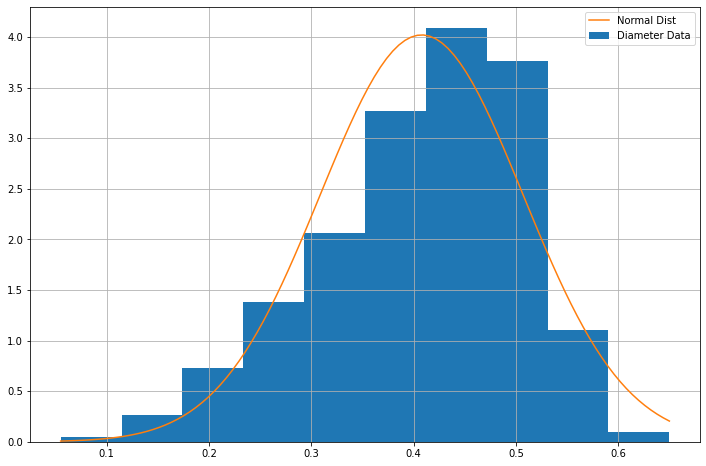

In [32]:
plt.figure(figsize =(12,8))
plt.hist(abalone.Diameter,density = True, label = 'Diameter Data')
plt.plot(xs,yx, label = 'Normal Dist')
#plt.plot(xs,log, label = 'Lognorm Dist')
#plt.plot(xs,exp, label = 'Exponential Dist')
plt.legend(loc = 'best')
plt.grid()
plt.show()

In [33]:
norm_fit = st.norm.fit(abalone['Diameter'])
lognorm_fit = st.lognorm.fit(abalone.Diameter)
exp_fit = st.expon.fit(abalone.Diameter)

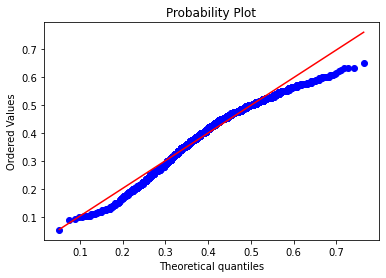

In [34]:

fig = plt.figure()
ax = fig.add_subplot(111)
st.probplot(abalone.Diameter, sparams = norm_fit,dist = st.norm, plot = ax)
plt.show()


In [35]:
exp_fit


(0.055, 0.35288125448886765)

Tutoria 09 de Sept: Regresion

In [36]:
abalone.head()

,Sex,Length,Diameter,Height,Whole weight,Shucked weight,Viscera weight,Shell weight,Rings
0,M,0.455,0.365,0.095,0.5140,0.2245,0.1010,0.150,15
1,M,0.350,0.265,0.090,0.2255,0.0995,0.0485,0.070,7
2,F,0.530,0.420,0.135,0.6770,0.2565,0.1415,0.210,9
3,M,0.440,0.365,0.125,0.5160,0.2155,0.1140,0.155,10
4,I,0.330,0.255,0.080,0.2050,0.0895,0.0395,0.055,7


In [37]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score, mean_squared_error
from sklearn.model_selection import train_test_split

In [38]:
abalone.columns

Index(['Sex', 'Length', 'Diameter', 'Height', 'Whole weight', 'Shucked weight',
       'Viscera weight', 'Shell weight', 'Rings'],
      dtype='object')

In [39]:
X = abalone[['Length', 'Diameter', 'Height', 'Rings']]
y = abalone['Viscera weight']

In [40]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=1111)

In [41]:
# inicializa
model = LinearRegression(fit_intercept = True)
# ajusta o entrena
model.fit(X_train,y_train)

LinearRegression()

In [42]:
# predice
y_pred = model.predict(X_test)
# evaluando

def scores(y_test,y_pred):
  r2 = r2_score(y_test,y_pred)
  msr = mean_squared_error(y_test,y_pred)

  return r2,msr
  

In [43]:
scores(y_test,y_pred)

(0.8269757436751194, 0.0021021302594860978)

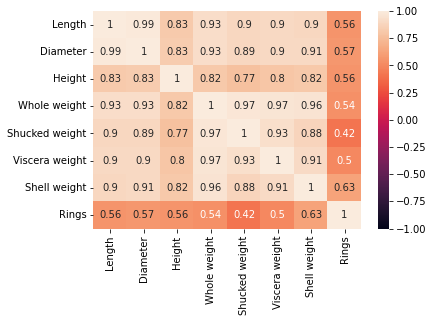

In [44]:
sns.heatmap(abalone.corr(),annot = True, vmin = -1, vmax = 1)
plt.show()

In [45]:
cor = abalone.corr().sort_values(by = 'Viscera weight',ascending = False)

In [46]:
cor.index.values[1:4]

array(['Whole weight', 'Shucked weight', 'Shell weight'], dtype=object)

In [47]:
model.coef_

array([ 4.98999832e-01,  2.98256934e-01,  3.08184750e-01, -4.74037858e-04])

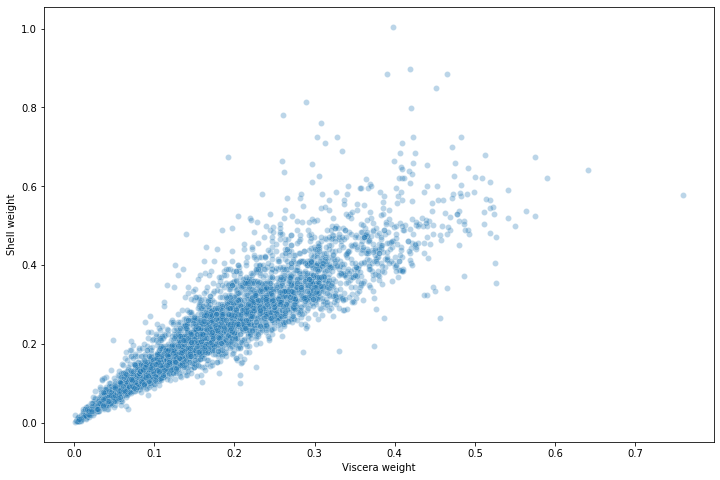

In [48]:
plt.figure(figsize = (12,8))
sns.scatterplot(x = 'Viscera weight', y = 'Shell weight', data = abalone, alpha = 0.3)
#sns.lineplot(x = X_test, y = model.predict(X_test))
plt.show()

Tutoria 21 de Septiembre, Clasificación Binaria

In [49]:
import statsmodels.api as sm
import statsmodels.formula.api as smf

In [50]:
abalone.head(5)

,Sex,Length,Diameter,Height,Whole weight,Shucked weight,Viscera weight,Shell weight,Rings
0,M,0.455,0.365,0.095,0.5140,0.2245,0.1010,0.150,15
1,M,0.350,0.265,0.090,0.2255,0.0995,0.0485,0.070,7
2,F,0.530,0.420,0.135,0.6770,0.2565,0.1415,0.210,9
3,M,0.440,0.365,0.125,0.5160,0.2155,0.1140,0.155,10
4,I,0.330,0.255,0.080,0.2050,0.0895,0.0395,0.055,7


In [51]:
abalone['Is_Infant'] = np.where(abalone['Sex'] == 'I',1,0)

In [52]:
abalone.drop(columns = ['Sex'], inplace = True)

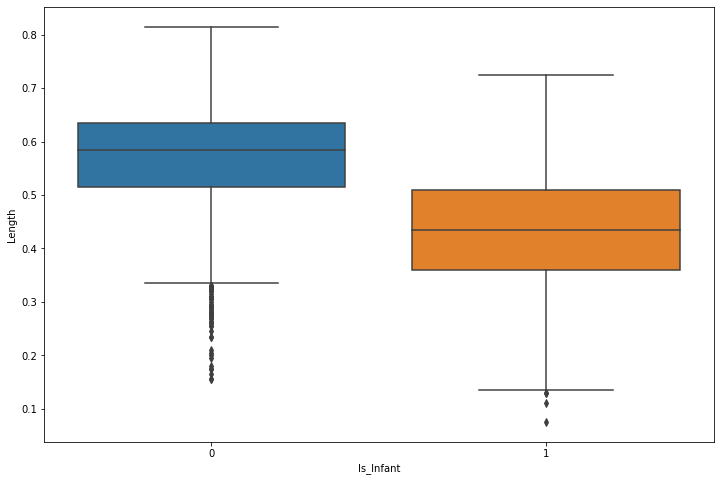

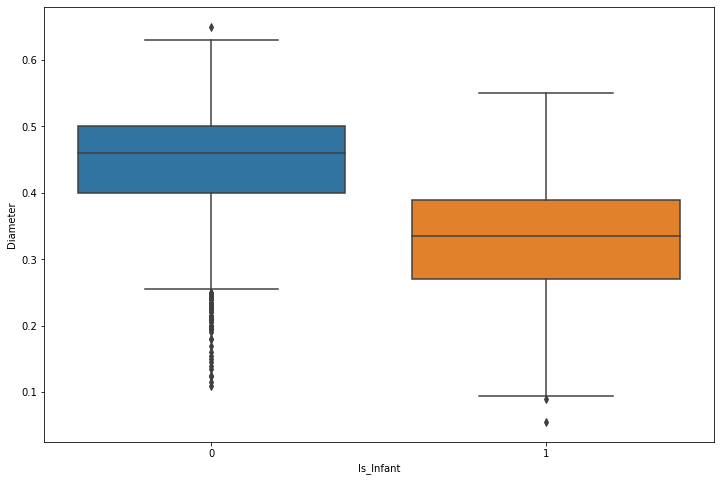

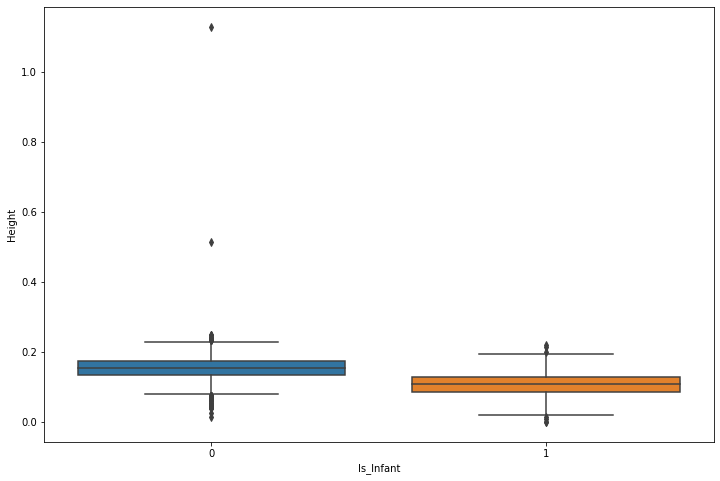

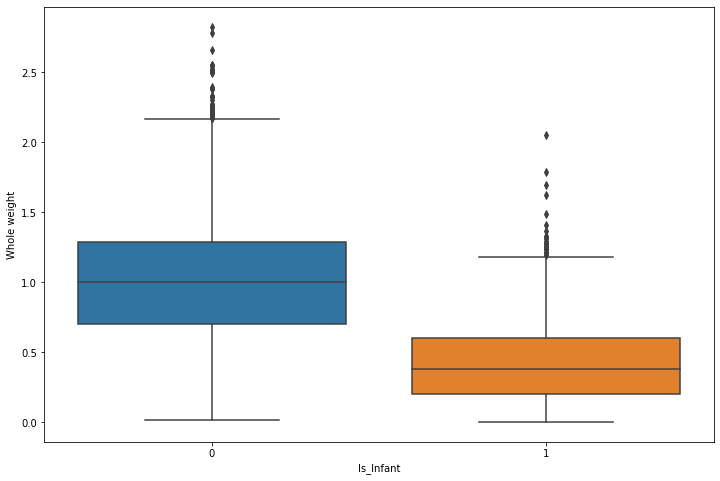

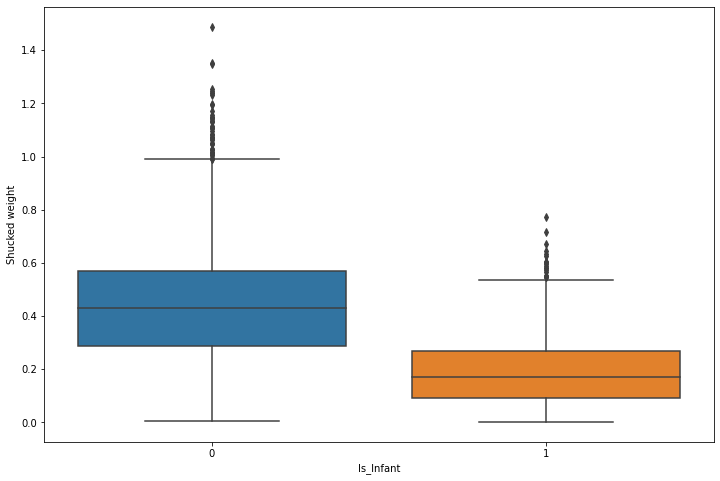

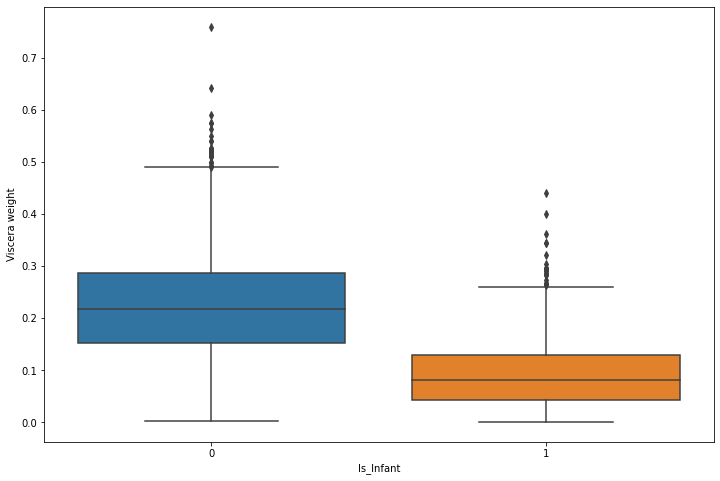

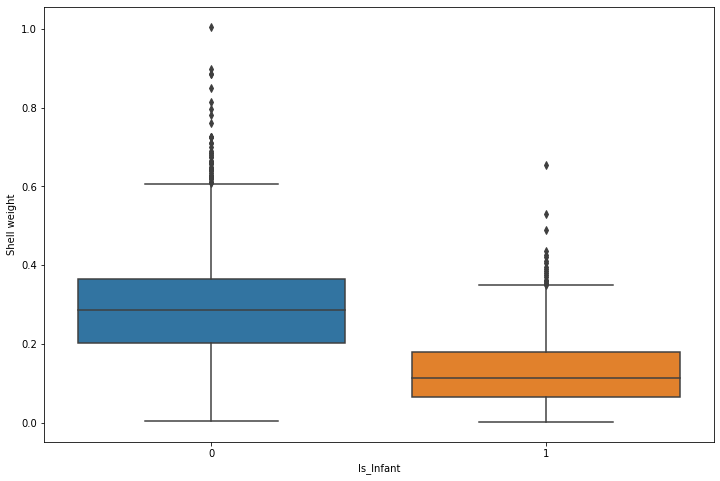

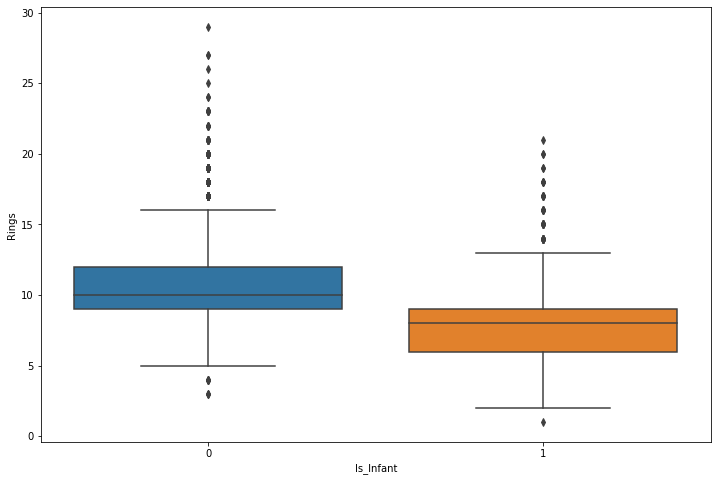

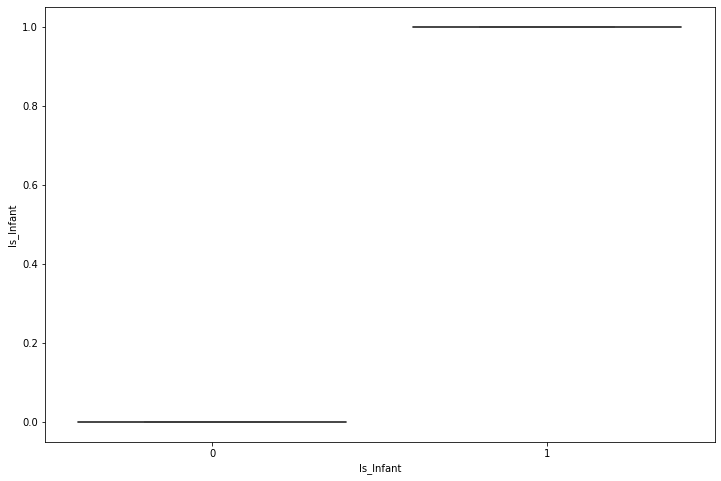

In [53]:
for column in abalone.columns:
  plt.figure(figsize=(12,8)) # Para configurar ek tamaño de las gráficas
  sns.boxplot(x=abalone["Is_Infant"], y = abalone[column]);
  #plt.title('Fig 4-boxplot: "income" vs  "default"')
  plt.show()

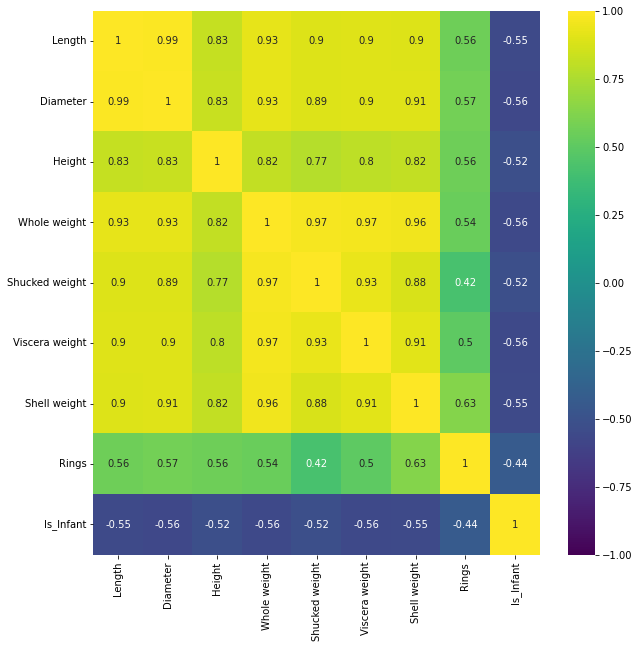

In [54]:
plt.figure(figsize = (10,10))
sns.heatmap(abalone.corr(),annot = True, vmin = -1, vmax = 1, cmap = 'viridis')
plt.show()

In [55]:
100*abalone['Is_Infant'].sum()/len(abalone)

32.12832176203017

In [56]:
abalone_1 = abalone[abalone['Height'] < 0.4]

In [57]:
abalone_1.describe()

,Length,Diameter,Height,Whole weight,Shucked weight,Viscera weight,Shell weight,Rings,Is_Infant
count,4175.000000,4175.000000,4175.000000,4175.000000,4175.000000,4175.000000,4175.000000,4175.000000,4175.000000
mean,0.523965,0.407856,0.139189,0.828468,0.359195,0.180536,0.238791,9.934132,0.321437
std,0.120084,0.099230,0.038489,0.490027,0.221713,0.109534,0.139162,3.224802,0.467084
min,0.075000,0.055000,0.000000,0.002000,0.001000,0.000500,0.001500,1.000000,0.000000
25%,0.450000,0.350000,0.115000,0.441500,0.186000,0.093250,0.130000,8.000000,0.000000
50%,0.545000,0.425000,0.140000,0.799500,0.336000,0.171000,0.234000,9.000000,0.000000
75%,0.615000,0.480000,0.165000,1.153000,0.501750,0.252750,0.328750,11.000000,1.000000
max,0.815000,0.650000,0.250000,2.825500,1.488000,0.760000,1.005000,29.000000,1.000000


In [123]:
from sklearn.ensemble import RandomForestClassifier,RandomForestRegressor
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import roc_curve, f1_score, classification_report, confusion_matrix, accuracy_score
from sklearn.model_selection import GridSearchCV, RandomizedSearchCV
# pip install bayesian-optimization 
# from bayes_opt import BayesianOptimization

In [117]:
scaler = StandardScaler()
X = scaler.fit_transform(abalone.drop(columns = ['Is_Infant']))
y = abalone['Is_Infant']

X_train, X_test, y_train, y_test = train_test_split(X,y,test_size = 0.2, stratify = y, random_state = 1111
                                                    )

In [60]:
modelo = LogisticRegression()

modelo.fit(X_train,y_train)
y_pred = modelo.predict(X_test)
y_proba = modelo.predict_proba(X_test)

In [61]:
print(classification_report(y_pred,y_test))

              precision    recall  f1-score   support

           0       0.87      0.87      0.87       568
           1       0.72      0.72      0.72       268

    accuracy                           0.82       836
   macro avg       0.79      0.79      0.79       836
weighted avg       0.82      0.82      0.82       836



In [62]:
falso_pos, verd_pos, threshold = roc_curve(y_test,y_pred)

In [63]:
modelo1 = LogisticRegression(class_weight = { 0:0.68, 1:0.32 })
modelo1.fit(X_train,y_train)
y_pred1 = modelo1.predict(X_test)

In [64]:
print(classification_report(y_pred1,y_test))

              precision    recall  f1-score   support

           0       0.95      0.82      0.88       659
           1       0.55      0.84      0.67       177

    accuracy                           0.82       836
   macro avg       0.75      0.83      0.77       836
weighted avg       0.87      0.82      0.83       836



In [67]:
param_grid = {'criterion' : ["gini", "entropy"],'n_estimators': [1, 10, 100,1000,10000],'class_weight' : [{ 0:0.68, 1:0.32 }, 'balanced']}
grid = GridSearchCV(RandomForestClassifier(),param_grid, cv = 4)

In [68]:
grid.fit(X,y)

KeyboardInterrupt: ignored

In [ ]:
grid.best_params_

In [69]:
modelo = RandomForestClassifier(class_weight= {0: 0.68, 1: 0.32},criterion ='entropy',
 n_estimators= 100)
modelo.fit(X_train,y_train)
y_pred = modelo.predict(X_test)

print(classification_report(y_pred,y_test))

              precision    recall  f1-score   support

           0       0.90      0.87      0.88       584
           1       0.72      0.77      0.74       252

    accuracy                           0.84       836
   macro avg       0.81      0.82      0.81       836
weighted avg       0.84      0.84      0.84       836



Tutoría 23 de Septiembre. Reducción de dimensionalidad y clustering

In [72]:
from sklearn.decomposition import PCA
from sklearn.cluster import KMeans

In [76]:
abalone_pca = abalone.drop(columns = ['Is_Infant']) # Esto escalado es = a X

In [80]:
pca = PCA()

pca.fit(X)

PCA()

In [81]:
pca.n_components_,pca.n_features_

(8, 8)

In [84]:
sorted(pca.explained_variance_)

[0.0063998566156007785,
 0.012697203638090957,
 0.06348796631816,
 0.08497000602295969,
 0.16602959147764393,
 0.25850500829488965,
 0.6957795408508022,
 6.714046535594115]

In [86]:
pca_variance = pd.DataFrame({'component': range(0,8),'explained_variance':pca.explained_variance_})

In [90]:
pca_variance['cumulated_variance'] = pca_variance['explained_variance'].cumsum()
pca_variance['cumulated_percentage'] = pca_variance['cumulated_variance']/pca_variance['explained_variance'].sum()

In [91]:
pca_variance.head(10)

,component,explained_variance,cumulated_variance,cumulated_percentage
0,0,6.714047,6.714047,0.839055
1,1,0.695780,7.409826,0.926007
2,2,0.258505,7.668331,0.958312
3,3,0.166030,7.834361,0.979061
4,4,0.084970,7.919331,0.989679
5,5,0.063488,7.982819,0.997613
6,6,0.012697,7.995516,0.999200
7,7,0.006400,8.001916,1.000000


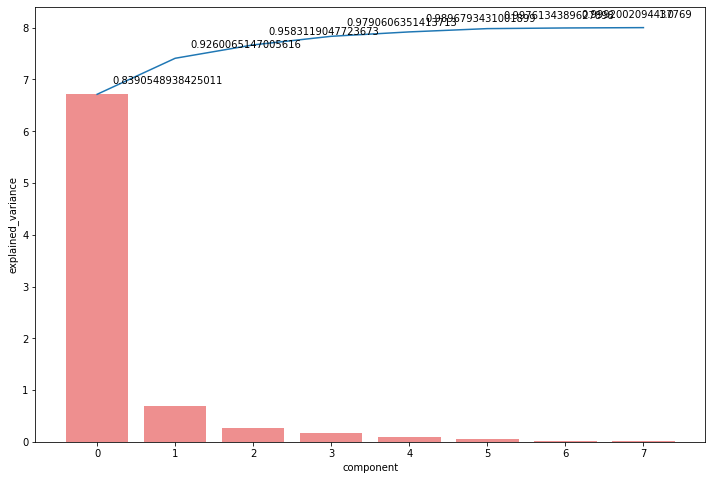

In [99]:
plt.figure(figsize = (12,8))
sns.barplot(x = 'component', y = 'explained_variance', data = pca_variance, alpha = 0.5, color = 'r')
sns.lineplot(x = 'component', y = 'cumulated_variance', data = pca_variance, markers = 'o-')

for comp, i in enumerate(pca_variance.component):
  plt.annotate(pca_variance['cumulated_percentage'].values[i],xy = (comp + 0.2, pca_variance.cumulated_variance.values[i] + 0.2))

plt.show()

In [100]:
pca.components_

array([[ 3.72138505e-01,  3.73094111e-01,  3.40026777e-01,
         3.78307478e-01,  3.62454487e-01,  3.68557801e-01,
         3.70757823e-01,  2.42712772e-01],
       [-6.82826958e-02, -4.00480412e-02,  7.04631477e-02,
        -1.37346192e-01, -2.98839921e-01, -1.72978517e-01,
         4.54004049e-02,  9.21203850e-01],
       [ 3.10703159e-02,  4.10050673e-02,  8.99705624e-01,
        -2.06193609e-01, -2.08286301e-01, -1.97379538e-01,
        -1.61574078e-01, -1.92143588e-01],
       [-6.04053517e-01, -5.87594701e-01,  2.56777039e-01,
         2.41848954e-01,  1.83245659e-01,  2.65220563e-01,
         2.44192067e-01,  4.33101254e-02],
       [-1.11248478e-02,  5.79110156e-02, -5.67292650e-02,
         1.56556128e-02, -3.98525300e-01, -3.09821489e-01,
         8.30563767e-01, -2.20025690e-01],
       [-4.74968278e-02, -2.33754046e-02,  2.66914622e-02,
         1.17255046e-01,  6.24892864e-01, -7.65843810e-01,
         3.28323476e-02,  6.81957909e-02],
       [-6.98825733e-01,  7.129851

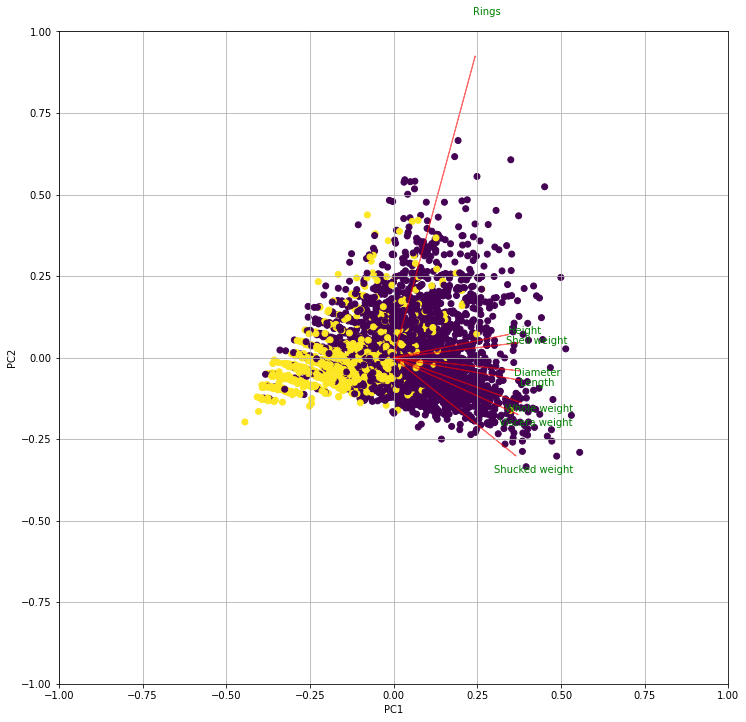

In [107]:
# bitplot
# import PCA ---> contiene bitplot
# TSNE ---> sklearn.manifolds.tsne

'''
https://stackoverflow.com/questions/50796024/feature-variable-importance-after-a-pca-analysis
'''
def myplot(score,coeff,labels=None):
    plt.figure(figsize = (12,12)) 
    xs = score[:,0]
    ys = score[:,1]
    n = coeff.shape[0]
    scalex = 1.0/(xs.max() - xs.min())
    scaley = 1.0/(ys.max() - ys.min())
    plt.scatter(xs * scalex,ys * scaley, c = y)
    for i in range(n):
        plt.arrow(0, 0, coeff[i,0], coeff[i,1],color = 'r',alpha = 0.5)
        if labels is None:
            plt.text(coeff[i,0]* 1.15, coeff[i,1] * 1.15, "Var"+str(i+1), color = 'g', ha = 'center', va = 'center')
        else:
            plt.text(coeff[i,0]* 1.15, coeff[i,1] * 1.15, labels[i], color = 'g', ha = 'center', va = 'center')
    plt.xlim(-1,1)
    plt.ylim(-1,1)
    plt.xlabel("PC{}".format(1))
    plt.ylabel("PC{}".format(2))
    plt.grid()

#Call the function. Use only the 2 PCs.
myplot(pca.transform(X),np.transpose(pca.components_[0:2, :]),abalone.columns)
plt.show()

In [131]:

pca1 = PCA(n_components = 3)
X1 = pca1.fit_transform(X)

y = abalone['Is_Infant']

X_train, X_test, y_train, y_test = train_test_split(X1,y,test_size = 0.2, stratify = y, random_state = 1111)
modelo1 = LogisticRegression(class_weight = { 0:0.68, 1:0.32 })
modelo1.fit(X_train,y_train)
y_pred1 = modelo1.predict(X_test)

print(classification_report(y_pred1,y_test))

              precision    recall  f1-score   support

           0       0.96      0.78      0.86       696
           1       0.44      0.85      0.58       140

    accuracy                           0.80       836
   macro avg       0.70      0.82      0.72       836
weighted avg       0.88      0.80      0.82       836



In [145]:
# kmeans

cluster = KMeans(n_clusters = 2)

cluster.fit(X)

abalone['2_clusters'] = cluster.labels_

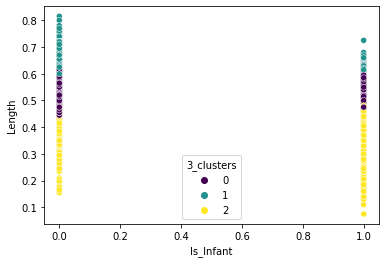

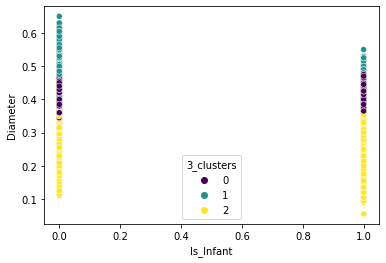

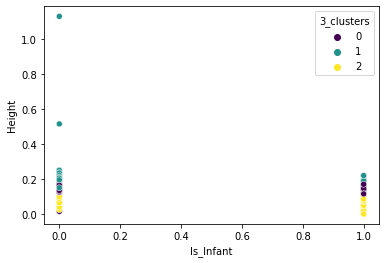

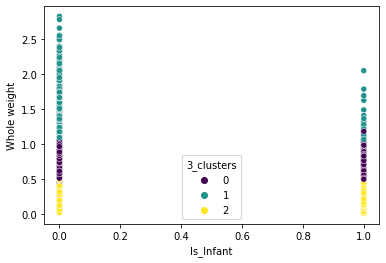

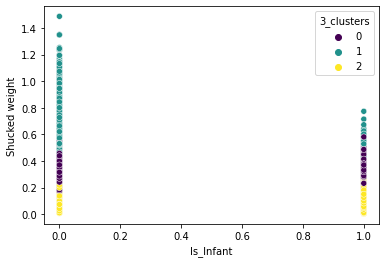

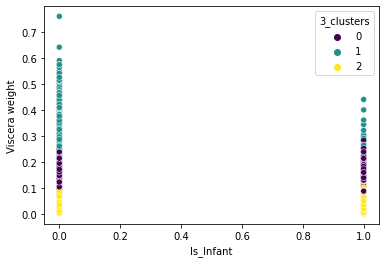

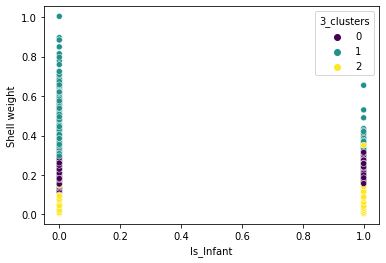

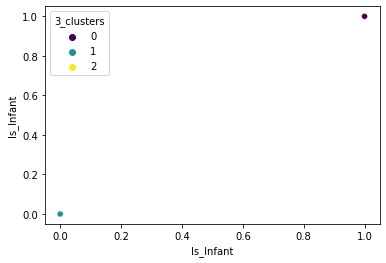

In [146]:
for col in abalone.drop(columns = ['3_clusters','8_clusters','2_clusters','Rings']).columns:

  plt.figure(figsize = (6,4))
  sns.scatterplot(x = 'Is_Infant', y = col, data = abalone, hue = '3_clusters', palette = 'viridis')
  plt.show()

In [138]:
inercia = []
n_clusters = []
for i in range(1,20):
  kmeans = KMeans(n_clusters = i)
  kmeans.fit(X)
  inercia.append(kmeans.inertia_)
  n_clusters.append(i)


/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning
/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


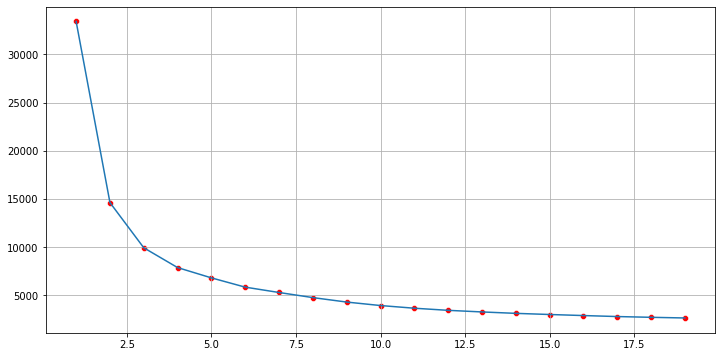

In [141]:
plt.figure(figsize = (12,6))
sns.lineplot(n_clusters, inercia)
sns.scatterplot(n_clusters, inercia, color = 'r')
plt.grid()
plt.show()

In [155]:
infant = abalone[abalone.Is_Infant == 1]
adult = abalone[abalone.Is_Infant == 0]

In [156]:
infant['2_clusters'].value_counts(),adult['2_clusters'].value_counts()

(1    1138
 0     204
 Name: 2_clusters, dtype: int64, 0    2066
 1     769
 Name: 2_clusters, dtype: int64)

In [153]:
help(pandas.series)

from scipy.cluster import hierarchy

NameError: ignored